- **Testing Steps:**
  1. Start with 'Faded.jpg' for an easier task.
  2. Proceed to 'Damaged.jpg' after the initial test.

- **Colorspace Conversion:**
  - Convert images to an appropriate colorspace to exaggerate damaged and undamaged areas.

- **Image Processing - Separation:**
  - Work on damaged and undamaged areas separately.

- **Enhancement:**
  - Increase contrast and definition for both damaged and undamaged areas.

- **Testing for Improvements:**
  - View image histograms.
  - Look for changes across rows and columns.

- **Interactive Elements (during development):**
  - Utilize tools like cv2.imshow for investigation.
  - Remove interactive elements before final submission.

- **Final Submission Requirements:**
  - Ensure the final submission contains no interactive elements.
  - Use cv2.imshow for development but remove before submission.


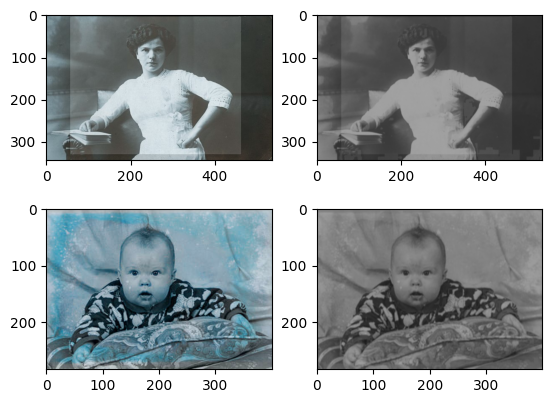

In [88]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Please DO NOT add any additional imports to this notebook
# Functionality using libraries other than those listed above will not be graded

def process_image(I: np.ndarray) -> np.ndarray:
    # Convert jpg to YUV
    YUV = cv2.cvtColor(I, cv2.COLOR_BGR2YUV)

    # Extract the individual YUV values from the image
    Y, U, V = cv2.split(YUV) # We isolate the U and V channels as they highlight the damaged areas in blue

    # Equalize the U and V channels to more evenly distribute the damage
    eqU = cv2.equalizeHist(U)
    eqV = cv2.equalizeHist(V)

    # Threshold the U and V channels to create masks for damaged areas
    _, maskU = cv2.threshold(eqU, 30, 195, cv2.THRESH_BINARY)
    _, maskV = cv2.threshold(eqV, 30, 195, cv2.THRESH_BINARY)

    # Ensure the masks have the same shape as U and V
    maskU = cv2.resize(maskU, (U.shape[1], U.shape[0]))
    maskV = cv2.resize(maskV, (V.shape[1], V.shape[0]))

    # Invert the masks
    inverted_maskU = cv2.bitwise_not(maskU)
    inverted_maskV = cv2.bitwise_not(maskV)

    # Subtract the inverted masks from the original U and V channels
    improvedU = cv2.subtract(U, inverted_maskU)
    improvedV = cv2.subtract(V, inverted_maskV)

    # Merge the improved channels with the original Y to get the improved image
    improvedYUV = cv2.merge([Y, improvedU, improvedV])

    # Convert back to BGR then to Greyscale
    improvedBGR = cv2.cvtColor(improvedYUV, cv2.COLOR_YUV2RGB)
    improvedGS = cv2.cvtColor(improvedBGR, cv2.COLOR_RGB2GRAY)

    # Define a Laplacian kernel for sharpening the image while blending damaged edges
    kernel = np.array([[1, 3, 1],
                       [1, 4, 1],
                       [1, 4, 1]]) / 22.0

    # Apply the kernel
    sharpened = cv2.filter2D(improvedGS, -1, kernel)

    # Convert the image back to the original colour space
    final = cv2.cvtColor(sharpened, cv2.COLOR_GRAY2RGB)

    return final

# Please DO NOT change any of the code below. All modifications to this template should
# occur inside the **process_image** function

fig, axs = plt.subplots(2, 2)
original_faded = cv2.imread('./faded.jpg')
improved_faded = process_image(original_faded)

axs[0, 0].imshow(original_faded)
axs[0, 1].imshow(improved_faded)

original_damaged = cv2.imread('./damaged.jpg')
improved_damaged = process_image(original_damaged)

axs[1, 0].imshow(original_damaged)
axs[1, 1].imshow(improved_damaged)
